# Thermal fit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import math
from numpy.linalg import inv
from qutip import *

In [2]:
def importData1(fname):
    timeTickFirst, timeTickLast, x, \
    PMT1, PMT1_raw, PMT1_bottom, PMT1_top, \
    PMT2, PMT2_raw, PMT2_bottom, PMT2_top = np.genfromtxt(fname, delimiter="\t",comments="#", unpack="True", encoding='latin1')
    return x, PMT2

In [3]:
nMax = 20
nList = np.arange(nMax)
def part(nbar):
    return np.sum(np.exp(-nList/nbar))
thermal_dm(nMax, 10).full()[1][1].real

0.09707407005995526

In [4]:
def thermal_fit(t, a, w, nbar):
    result = 0
    mat = thermal_dm(nMax, nbar).full()
    for n in range(nMax):
        result += mat[n][n].real*a*a*np.sin(np.sqrt(n+1)*w*t)**2
    return result/part(nbar)

def sinfit(t, a, w):
    return a*np.sin(w*t)**2

def linearfit(x, k, b):
    return k*x+b

def r_square(test):
    residuals = test[1]-coherent_fit(test[0], *alpha[0])
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((test[1]-np.mean(test[1]))**2)
    r_2 = 1-(ss_res/ss_tot)
    return r_2

In [5]:
def r_square(ydata, yfit):
    residuals = ydata-yfit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((ydata-np.mean(ydata))**2)
    r_2 = 1-(ss_res/ss_tot)
    return r_2

In [13]:
# Common
F_0 = importData1('RamanTimeScan_RSB11_047') # COM, gs
F_1 = importData1('RamanTimeScan_RSB11_048') # common

In [14]:
thermal_fit(F_1[0], 1, 1, 1)

array([0.        , 0.21435399, 0.36627361, 0.24636918, 0.38255916,
       0.57681921, 0.41214708, 0.3303564 , 0.46420497, 0.30307832,
       0.0708118 , 0.18611338, 0.24638037, 0.16235307, 0.3356619 ,
       0.50989637, 0.39840238, 0.39181673, 0.51436871, 0.3677164 ,
       0.19036262, 0.24458158, 0.18649728, 0.07285299, 0.25113553,
       0.42389181, 0.35504291, 0.39901951, 0.54369084, 0.43302031,
       0.29279949, 0.34318549, 0.25018398, 0.06136121, 0.14928802,
       0.31292719, 0.29335285, 0.3473946 , 0.50827777, 0.46868337,
       0.36507458, 0.40723563, 0.34615374, 0.15681646, 0.12841709,
       0.2048197 , 0.21455308, 0.28699649, 0.43733862, 0.45706512,
       0.41680793])

(0.5917482444671331, 0.008227371508036384)

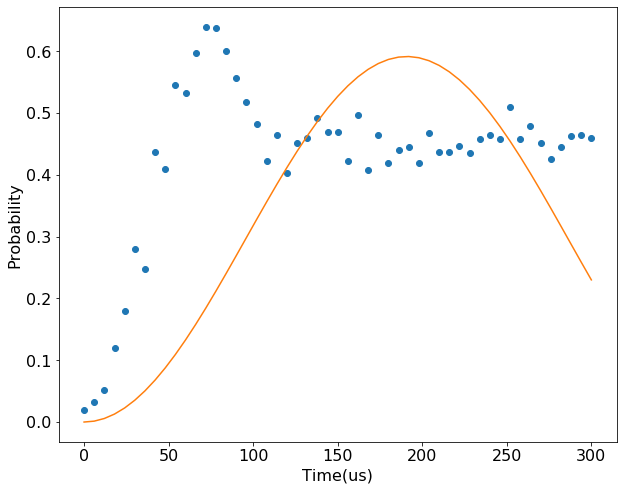

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.plot(F_1[0], F_1[1], 'o')
a, w_0 = opt.curve_fit(sinfit, F_1[0], F_1[1], [1, np.pi/600])[0]

# tList = np.linspace(0, 500, 251)
ax.plot(F_1[0], sinfit(F_1[0], a, w_0))

ax.set_xlabel('Time(us)', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)
a, w_0

In [17]:
# test = F_1
result_0 = opt.curve_fit(thermal_fit, F_0[0], F_0[1], [a, w_0, .01], sigma=np.sqrt(F_0[1]*(1-F_0[1])/300+1e-6))
result_1 = opt.curve_fit(thermal_fit, F_1[0], F_1[1], [a, w_0, .01], sigma=np.sqrt(F_1[1]*(1-F_1[1])/300+1e-6))
# result_2 = opt.curve_fit(thermal_fit, F_2[0], F_2[1], [a, w_0, .01], sigma=np.sqrt(F_2[1]*(1-F_2[1])/300+1e-6))
# result_3 = opt.curve_fit(thermal_fit, F_3[0], F_3[1], [a, w_0, .01], sigma=np.sqrt(F_3[1]*(1-F_3[1])/300+1e-6))#
# result_4 = opt.curve_fit(thermal_fit, F_4[0], F_4[1], [a, w_0, .01], sigma=np.sqrt(F_4[1]*(1-F_4[1])/100+1e-6))
# result_5 = opt.curve_fit(thermal_fit, F_5[0], F_5[1], [a, w_0, .01], sigma=np.sqrt(F_5[1]*(1-F_5[1])/100+1e-6))
# result_6 = opt.curve_fit(thermal_fit, F_6[0], F_6[1], [a, w_0, .01], sigma=np.sqrt(F_6[1]*(1-F_6[1])/100+1e-6))
result_0[0]

array([0.90130465, 0.00750642, 0.22289713])

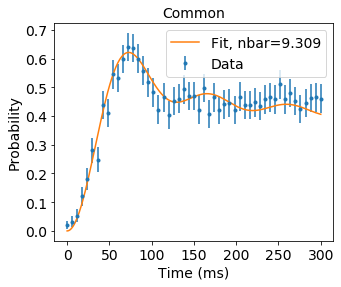

In [19]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.errorbar(F_1[0], F_1[1], np.sqrt(F_1[1]*(1-F_1[1])/100), fmt='.', label = 'Data')
tlist = np.linspace(0, max(F_1[0]), 251)
ax.plot(tlist, thermal_fit(tlist, *result_1[0]), label = 'Fit, nbar=%.3f' % result_1[0][-1])#str(alpha[0][-1]))
# ax.plot(F_1[0], coherent_fit(F_1[0], *alpha[0]), label = 'Fit, alpha='+str(alpha[0][-1]))
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.set_title('Common', fontsize=14)
ax.legend(fontsize=14)

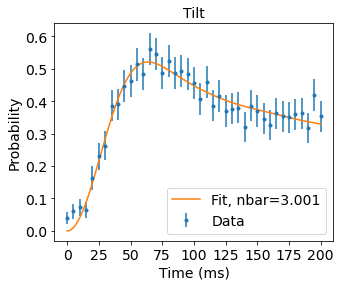

In [48]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.errorbar(F_3[0], F_3[1], np.sqrt(F_3[1]*(1-F_3[1])/100), fmt='.', label = 'Data')
tlist = np.linspace(0, max(F_3[0]), 251)
ax.plot(tlist, thermal_fit(tlist, *result_3[0]), label = 'Fit, nbar=%.3f' % result_3[0][-1])#str(alpha[0][-1]))
# ax.plot(F_1[0], coherent_fit(F_1[0], *alpha[0]), label = 'Fit, alpha='+str(alpha[0][-1]))
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.set_title('Tilt', fontsize=14)
ax.legend(fontsize=14)

(0.6996334352937524, 0.013720856355287785)

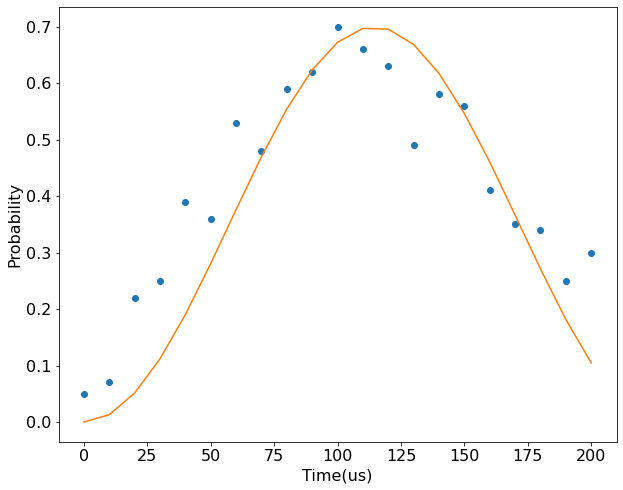

In [49]:
fig, ax = plt.subplots(1, 1, figsize = (10, 8))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)
ax.plot(F_0[0], F_0[1], 'o')
a, w_0 = opt.curve_fit(sinfit, F_0[0], F_0[1], [1, np.pi/600])[0]

# tList = np.linspace(0, 500, 251)
ax.plot(F_0[0], sinfit(F_0[0], a, w_0))

ax.set_xlabel('Time(us)', fontsize=16)
ax.set_ylabel('Probability', fontsize=16)
a, w_0

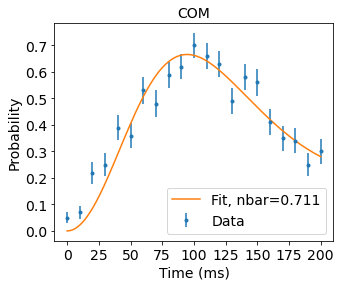

In [50]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.errorbar(F_0[0], F_0[1], np.sqrt(F_0[1]*(1-F_0[1])/100), fmt='.', label = 'Data')
tlist = np.linspace(0, max(F_0[0]), 251)
ax.plot(tlist, thermal_fit(tlist, *result_0[0]), label = 'Fit, nbar=%.3f' % result_0[0][-1])#str(alpha[0][-1]))
# ax.plot(F_1[0], coherent_fit(F_1[0], *alpha[0]), label = 'Fit, alpha='+str(alpha[0][-1]))
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.set_title('COM', fontsize=14)
ax.legend(fontsize=14)

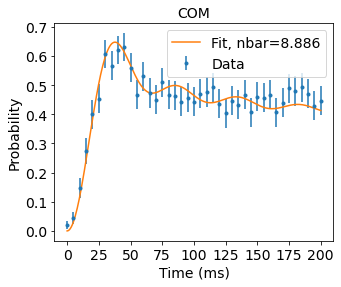

In [51]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.errorbar(F_2[0], F_2[1], np.sqrt(F_2[1]*(1-F_2[1])/100), fmt='.', label = 'Data')
tlist = np.linspace(0, max(F_2[0]), 251)
ax.plot(tlist, thermal_fit(tlist, *result_2[0]), label = 'Fit, nbar=%.3f' % result_2[0][-1])#str(alpha[0][-1]))
# ax.plot(F_1[0], coherent_fit(F_1[0], *alpha[0]), label = 'Fit, alpha='+str(alpha[0][-1]))
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.set_title('COM', fontsize=14)
ax.legend(fontsize=14)

In [38]:
waitTime_list = np.array([0, 10, 25, 50, 75, 100])/1e3
nbar_list = np.array([result_1[0][2], result_2[0][2], result_3[0][2], result_4[0][2], result_5[0][2], result_6[0][2]])
nbar_err = np.sqrt(np.array([result_1[1][-1][-1], result_2[1][-1][-1], result_3[1][-1][-1], result_4[1][-1][-1], result_5[1][-1][-1], result_6[1][-1][-1]]))
plt.errorbar(waitTime_list*1e3, nbar_list, nbar_err, fmt='.')
k_com, b_com = opt.curve_fit(linearfit, waitTime_list, nbar_list, [10, 0.2], sigma=nbar_err)[0]
k_com_err = np.sqrt(opt.curve_fit(linearfit, waitTime_list, nbar_list, [10, 0.2], sigma=nbar_err)[1][0][0])
plt.plot(waitTime_list*1e3, linearfit(waitTime_list, k_com, b_com), label='Heating rate=%.3f$\pm$%.3f q/s' % (k_com, k_com_err))
plt.legend()

NameError: name 'result_4' is not defined

In [134]:
# Tilt
G_1 = importData1('TwoToneTimeScan_Blue21_HeatingRate_001') # No wait
G_2 = importData1('TwoToneTimeScan_Blue21_HeatingRate_008') # 10 ms (009)
G_3 = importData1('TwoToneTimeScan_Blue21_HeatingRate_010') # 50 ms
G_4 = importData1('TwoToneTimeScan_Blue21_HeatingRate_011') # 100 ms
G_5 = importData1('TwoToneTimeScan_Blue21_HeatingRate_012') # 200 ms
G_6 = importData1('TwoToneTimeScan_Blue21_HeatingRate_013') # 500 ms

In [135]:
result_T1 = opt.curve_fit(thermal_fit, G_1[0], G_1[1], [a, w_0, .01], sigma=np.sqrt(G_1[1]*(1-G_1[1])/100+1e-6))
result_T2 = opt.curve_fit(thermal_fit, G_2[0], G_2[1], [a, w_0, .01], sigma=np.sqrt(G_2[1]*(1-G_2[1])/100+1e-6))
result_T3 = opt.curve_fit(thermal_fit, G_3[0], G_3[1], [a, w_0, .01], sigma=np.sqrt(G_3[1]*(1-G_3[1])/100+1e-6))
result_T4 = opt.curve_fit(thermal_fit, G_4[0], G_4[1], [a, w_0, .01], sigma=np.sqrt(G_4[1]*(1-G_4[1])/100+1e-6))
result_T5 = opt.curve_fit(thermal_fit, G_5[0], G_5[1], [a, w_0, .01], sigma=np.sqrt(G_5[1]*(1-G_5[1])/100+1e-6))
result_T6 = opt.curve_fit(thermal_fit, G_6[0], G_6[1], [a, w_0, .01], sigma=np.sqrt(G_6[1]*(1-G_6[1])/100+1e-6))
result_T6[0][2]

0.11755993323981812

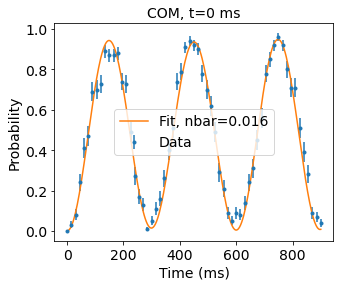

In [137]:
fig, ax = plt.subplots(1, 1, figsize = (5, 4))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(14)
ax.errorbar(G_2[0], G_2[1], np.sqrt(G_2[1]*(1-G_2[1])/100), fmt='.', label = 'Data')
tlist = np.linspace(0, max(G_1[0]), 251)
ax.plot(tlist, thermal_fit(tlist, *result_T2[0]), label = 'Fit, nbar=%.3f' % result_T2[0][-1])#str(alpha[0][-1]))
# ax.plot(F_1[0], coherent_fit(F_1[0], *alpha[0]), label = 'Fit, alpha='+str(alpha[0][-1]))
ax.set_xlabel('Time (ms)', fontsize=14)
ax.set_ylabel('Probability', fontsize=14)
ax.set_title('COM, t=0 ms', fontsize=14)
ax.legend(fontsize=14)

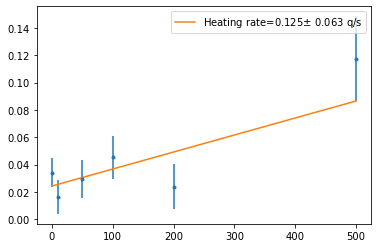

In [174]:
waitTime_list_T = np.array([0, 10, 50, 100, 200, 500])/1e3
nbar_list_T = np.array([result_T1[0][2], result_T2[0][2], result_T3[0][2], result_T4[0][2], result_T5[0][2], result_T6[0][2]])
nbar_err_T = np.sqrt(np.array([result_T1[1][-1][-1], result_T2[1][-1][-1], result_T3[1][-1][-1], result_T4[1][-1][-1], result_T5[1][-1][-1], result_T6[1][-1][-1]]))
plt.errorbar(waitTime_list_T*1e3, nbar_list_T, nbar_err_T, fmt='.')
k_T, b_T = opt.curve_fit(linearfit, waitTime_list_T, nbar_list_T, [1, 0.02], sigma=nbar_err_T)[0]
k_T_err = np.sqrt(opt.curve_fit(linearfit, waitTime_list_T, nbar_list_T, [1, 0.02], sigma=nbar_err_T)[1][0][0])
plt.plot(waitTime_list_T*1e3, linearfit(waitTime_list_T, k_T, b_T), label='Heating rate=%.3f$\pm$%.3f q/s' % (k_T, k_T_err))
plt.legend()

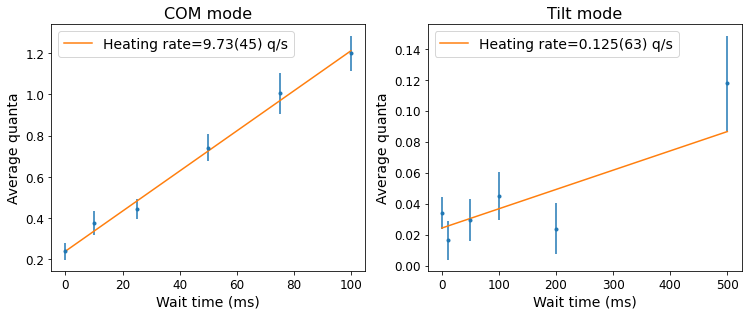

In [188]:
fig, ax = plt.subplots(1, 2, figsize = (10.5, 4.5))
ax[0].errorbar(waitTime_list*1e3, nbar_list, nbar_err, fmt='.')
ax[0].plot(waitTime_list*1e3, linearfit(waitTime_list, k_com, b_com), label='Heating rate=%.2f(%.0f) q/s' % (k_com, k_com_err*100))
ax[0].legend(fontsize=14)
ax[1].errorbar(waitTime_list_T*1e3, nbar_list_T, nbar_err_T, fmt='.')

ax[1].plot(waitTime_list_T*1e3, linearfit(waitTime_list_T, k_T, b_T), label='Heating rate=%.3f(%.0f) q/s' % (k_T, k_T_err*1000))
ax[1].legend(fontsize=14, loc='upper left')

for i in range(2):
    ax[i].set_xlabel('Wait time (ms)', fontsize=14)
    ax[i].set_ylabel('Average quanta', fontsize=14)
    for label in (ax[i].get_xticklabels() + ax[i].get_yticklabels()):
        label.set_fontsize(12)
        
ax[0].set_title('COM mode', fontsize=16)
ax[1].set_title('Tilt mode', fontsize=16)
        
plt.tight_layout()

plt.savefig('HeatingRate.pdf', format='pdf')